In [0]:
#задание выполнялось в google colab, для открытия файла требуется нажать кнопку выбрать файлы 
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving training.csv to training.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from keras.layers.advanced_activations import LeakyReLU, ELU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam

In [0]:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

sample_image_index = 30

In [0]:
train_file = 'training.csv'
test_file = 'test.csv'

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [0]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [0]:
clean_train_data = train_data.dropna()
print("clean_train_data shape: {}".format(np.shape(clean_train_data)))


clean_train_data shape: (2140, 31)


In [0]:
clean_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2283
Data columns (total 31 columns):
left_eye_center_x            2140 non-null float64
left_eye_center_y            2140 non-null float64
right_eye_center_x           2140 non-null float64
right_eye_center_y           2140 non-null float64
left_eye_inner_corner_x      2140 non-null float64
left_eye_inner_corner_y      2140 non-null float64
left_eye_outer_corner_x      2140 non-null float64
left_eye_outer_corner_y      2140 non-null float64
right_eye_inner_corner_x     2140 non-null float64
right_eye_inner_corner_y     2140 non-null float64
right_eye_outer_corner_x     2140 non-null float64
right_eye_outer_corner_y     2140 non-null float64
left_eyebrow_inner_end_x     2140 non-null float64
left_eyebrow_inner_end_y     2140 non-null float64
left_eyebrow_outer_end_x     2140 non-null float64
left_eyebrow_outer_end_y     2140 non-null float64
right_eyebrow_inner_end_x    2140 non-null float64
right_eyebrow_inner_end_y 

In [0]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=20)
    plt.title(title)

Shape of clean_train_images: (2140, 96, 96, 1)
Shape of clean_train_keypoints: (2140, 30)
Shape of test_images: (1783, 96, 96, 1)


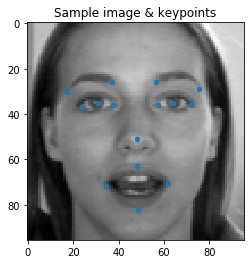

In [0]:
def load_images(image_data):
    images = []
    for idx, sample in image_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def load_keypoints(keypoint_data):
    keypoint_data = keypoint_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features

clean_train_images = load_images(clean_train_data)
print("Shape of clean_train_images: {}".format(np.shape(clean_train_images)))
clean_train_keypoints = load_keypoints(clean_train_data)
print("Shape of clean_train_keypoints: {}".format(np.shape(clean_train_keypoints)))
test_images = load_images(test_data)
print("Shape of test_images: {}".format(np.shape(test_images)))

train_images = clean_train_images
train_keypoints = clean_train_keypoints
fig, axis = plt.subplots()
plot_sample(clean_train_images[sample_image_index], clean_train_keypoints[sample_image_index], axis, "Sample image & keypoints")

In [0]:
brightness_augmentation = True
random_noise_augmentation = True

Shape of altered_brightness_train_images: (4280, 96, 96, 1)
Shape of altered_brightness_train_keypoints: (4280, 30)


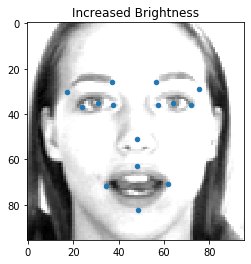

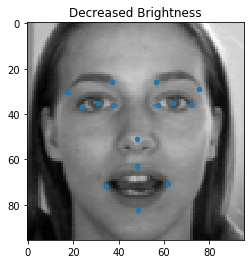

In [0]:
def alter_brightness(images, keypoints):
    altered_brightness_images = []
    inc_brightness_images = np.clip(images*2.2, 0.0, 1.0)    # увелечение яркости
    dec_brightness_images = np.clip(images*0.3, 0.0, 1.0)    # уменьшение яркости
    altered_brightness_images.extend(inc_brightness_images)
    altered_brightness_images.extend(dec_brightness_images)
    return altered_brightness_images, np.concatenate((keypoints, keypoints))

if brightness_augmentation:
    altered_brightness_train_images, altered_brightness_train_keypoints = alter_brightness(clean_train_images, clean_train_keypoints)
    print(f"Shape of altered_brightness_train_images: {np.shape(altered_brightness_train_images)}")
    print(f"Shape of altered_brightness_train_keypoints: {np.shape(altered_brightness_train_keypoints)}")
    train_images = np.concatenate((train_images, altered_brightness_train_images))
    train_keypoints = np.concatenate((train_keypoints, altered_brightness_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(altered_brightness_train_images[sample_image_index], altered_brightness_train_keypoints[sample_image_index], axis, "Increased Brightness") 
    fig, axis = plt.subplots()
    plot_sample(altered_brightness_train_images[len(altered_brightness_train_images)//2+sample_image_index], altered_brightness_train_keypoints[len(altered_brightness_train_images)//2+sample_image_index], axis, "Decreased Brightness") 

Shape of noisy_train_images: (2140, 96, 96, 1)


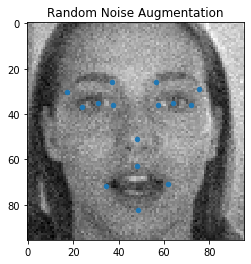

In [0]:
def add_noise(images):
    noisy_images = []
    for image in images:
        noisy_image = cv2.add(image, 0.05*np.random.randn(96,96,1))    # добавление шума
        noisy_images.append(noisy_image.reshape(96,96,1))
    return noisy_images

if random_noise_augmentation:
    noisy_train_images = add_noise(clean_train_images)
    print(f"Shape of noisy_train_images: {np.shape(noisy_train_images)}")
    train_images = np.concatenate((train_images, noisy_train_images))
    train_keypoints = np.concatenate((train_keypoints, clean_train_keypoints))
    fig, axis = plt.subplots()
    plot_sample(noisy_train_images[sample_image_index], clean_train_keypoints[sample_image_index], axis, "Random Noise Augmentation")

In [0]:
print("Shape of final train_images: {}".format(np.shape(train_images)))
print("Shape of final train_keypoints: {}".format(np.shape(train_keypoints)))

Shape of final train_images: (8560, 96, 96, 1)
Shape of final train_keypoints: (8560, 30)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_keypoints, test_size=0.05, random_state=42)
X_train.shape, X_valid.shape

((8132, 96, 96, 1), (428, 96, 96, 1))

In [0]:
# Configure Model
model = Sequential()
# Input dimensions: (None, 96, 96, 1)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 48, 48, 32)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 64)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 96)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 128)
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 256)
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [0]:
# Compile model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [0]:
%%time
history = model.fit(train_images, train_keypoints, epochs=100, batch_size=128, validation_data=[X_valid,y_valid])



Train on 8560 samples, validate on 428 samples
Epoch 1/100
8560/8560 [==============================] - 12s 1ms/step - loss: 143.5559 - mean_absolute_error: 7.0960 - acc: 0.4341 - val_loss: 17.9828 - val_mean_absolute_error: 3.3375 - val_acc: 0.6986
Epoch 2/100
8560/8560 [==============================] - 6s 742us/step - loss: 22.2683 - mean_absolute_error: 3.6995 - acc: 0.5422 - val_loss: 7.7007 - val_mean_absolute_error: 2.0378 - val_acc: 0.6986
Epoch 3/100
8560/8560 [==============================] - 6s 740us/step - loss: 17.4241 - mean_absolute_error: 3.2649 - acc: 0.5706 - val_loss: 8.1378 - val_mean_absolute_error: 2.1665 - val_acc: 0.7056
Epoch 4/100
8560/8560 [==============================] - 6s 735us/step - loss: 14.4947 - mean_absolute_error: 2.9738 - acc: 0.5930 - val_loss: 5.4769 - val_mean_absolute_error: 1.6927 - val_acc: 0.7009
Epoch 5/100
8560/8560 [==============================] - 6s 739us/step - loss: 12.4171 - mean_absolute_error: 2.7491 - acc: 0.6136 - val_loss:

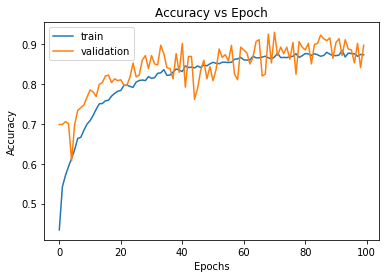

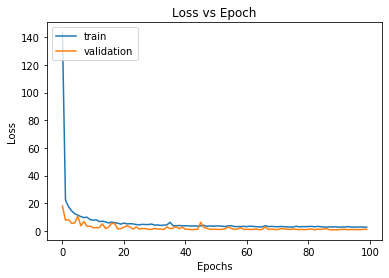

In [0]:
try:
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Accuracy vs Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [0]:
# Configure model_2
model_2 = Sequential()
# Input dimensions: (None, 96, 96, 1)
model_2.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,1)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model_2.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 48, 48, 32)
model_2.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model_2.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 64)
model_2.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model_2.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 96)
model_2.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model_2.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 128)
model_2.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model_2.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 256)
model_2.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model_2.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model_2.add(Flatten())
model_2.add(Dense(512,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(30))

In [0]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
activation_2 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)       

In [0]:
# Compile model
model_2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [0]:
%%time
history_2 = model_2.fit(train_images, train_keypoints, epochs=100, batch_size=128, validation_data=[X_valid,y_valid])

Train on 8560 samples, validate on 428 samples
Epoch 1/100
8560/8560 [==============================] - 8s 991us/step - loss: 156.9139 - mean_absolute_error: 7.3752 - acc: 0.4088 - val_loss: 20.8713 - val_mean_absolute_error: 3.6557 - val_acc: 0.6986
Epoch 2/100
8560/8560 [==============================] - 6s 690us/step - loss: 22.2584 - mean_absolute_error: 3.6975 - acc: 0.5297 - val_loss: 7.6380 - val_mean_absolute_error: 2.0332 - val_acc: 0.6963
Epoch 3/100
8560/8560 [==============================] - 6s 691us/step - loss: 17.7071 - mean_absolute_error: 3.2919 - acc: 0.5664 - val_loss: 6.4918 - val_mean_absolute_error: 1.8764 - val_acc: 0.6963
Epoch 4/100
8560/8560 [==============================] - 6s 687us/step - loss: 14.4004 - mean_absolute_error: 2.9676 - acc: 0.5874 - val_loss: 5.2130 - val_mean_absolute_error: 1.6670 - val_acc: 0.6986
Epoch 5/100
8560/8560 [==============================] - 6s 689us/step - loss: 12.2935 - mean_absolute_error: 2.7411 - acc: 0.6098 - val_loss: 

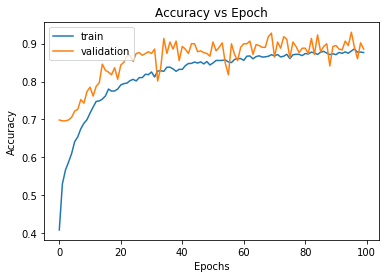

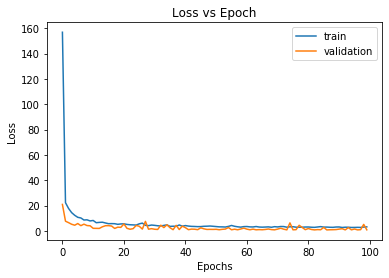

In [0]:
try:
    # summarize history for accuracy
    plt.plot(history_2.history['acc'])
    plt.plot(history_2.history['val_acc'])
    plt.title('Accuracy vs Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.title('Loss vs Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [0]:
# Configure model_3
model_3 = Sequential()
# Input dimensions: (None, 96, 96, 1)
model_3.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,1)))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model_3.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 48, 48, 32)
model_3.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model_3.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 64)
model_3.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model_3.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 96)
model_3.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model_3.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 128)
model_3.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model_3.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
model_3.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 256)
model_3.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model_3.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_3.add(ELU(alpha=1.0))
model_3.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model_3.add(Flatten())
model_3.add(Dense(512,activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(30))

In [0]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
elu_1 (ELU)                  (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
elu_2 (ELU)                  (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 32)       

In [0]:
model_3.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [0]:
%%time
history_3 = model_3.fit(train_images, train_keypoints, epochs=100, batch_size=128, validation_data=[X_valid,y_valid])

Train on 8560 samples, validate on 428 samples
Epoch 1/100
8560/8560 [==============================] - 9s 1ms/step - loss: 133.2884 - mean_absolute_error: 6.7431 - acc: 0.4609 - val_loss: 35.9602 - val_mean_absolute_error: 5.0428 - val_acc: 0.6986
Epoch 2/100
8560/8560 [==============================] - 6s 691us/step - loss: 20.6692 - mean_absolute_error: 3.5643 - acc: 0.5447 - val_loss: 7.2820 - val_mean_absolute_error: 1.9834 - val_acc: 0.6963
Epoch 3/100
8560/8560 [==============================] - 6s 690us/step - loss: 16.0425 - mean_absolute_error: 3.1350 - acc: 0.5702 - val_loss: 8.2184 - val_mean_absolute_error: 2.1715 - val_acc: 0.6869
Epoch 4/100
8560/8560 [==============================] - 6s 691us/step - loss: 13.4610 - mean_absolute_error: 2.8698 - acc: 0.6096 - val_loss: 5.1428 - val_mean_absolute_error: 1.6470 - val_acc: 0.7056
Epoch 5/100
8560/8560 [==============================] - 6s 693us/step - loss: 11.0242 - mean_absolute_error: 2.5951 - acc: 0.6197 - val_loss: 4.

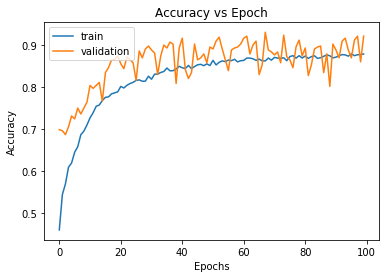

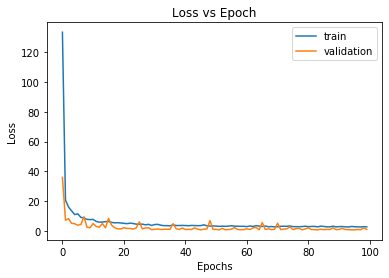

In [0]:
try:
    # summarize history for accuracy
    plt.plot(history_3.history['acc'])
    plt.plot(history_3.history['val_acc'])
    plt.title('Accuracy vs Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.title('Loss vs Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [0]:
# Configure model_mix
model_mix = Sequential()
# Input dimensions: (None, 96, 96, 1)
model_mix.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,1)))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 96, 96, 32)
model_mix.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
model_mix.add(MaxPool2D(pool_size=(2, 2)))
# Input dimensions: (None, 48, 48, 32)
model_mix.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 48, 48, 64)
model_mix.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())
model_mix.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 24, 24, 64)
model_mix.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 24, 24, 96)
model_mix.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
model_mix.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 12, 12, 96)
model_mix.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 12, 12, 128)
model_mix.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())
model_mix.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 6, 6, 128)
model_mix.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 6, 6, 256)
model_mix.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model_mix.add(LeakyReLU(alpha = 0.1))
model_mix.add(BatchNormalization())
model_mix.add(MaxPool2D(pool_size=(2, 2)))

# Input dimensions: (None, 3, 3, 256)
model_mix.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())
# Input dimensions: (None, 3, 3, 512)
model_mix.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model_mix.add(ELU(alpha=1.0))
model_mix.add(BatchNormalization())

# Input dimensions: (None, 3, 3, 512)
model_mix.add(Flatten())
model_mix.add(Dense(512,activation='relu'))
model_mix.add(Dropout(0.1))
model_mix.add(Dense(30))

In [0]:
model_mix.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 32)       

In [0]:
model_mix.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae', 'acc'])

In [0]:
%%time
history_mix = model_mix.fit(train_images, train_keypoints, epochs=100, batch_size=128, validation_data=[X_valid,y_valid])

Train on 8560 samples, validate on 428 samples
Epoch 1/100
8560/8560 [==============================] - 10s 1ms/step - loss: 146.1187 - mean_absolute_error: 7.0570 - acc: 0.4583 - val_loss: 32.7339 - val_mean_absolute_error: 4.7790 - val_acc: 0.6986
Epoch 2/100
8560/8560 [==============================] - 6s 732us/step - loss: 21.2220 - mean_absolute_error: 3.6167 - acc: 0.5313 - val_loss: 7.6630 - val_mean_absolute_error: 2.0449 - val_acc: 0.6846
Epoch 3/100
8560/8560 [==============================] - 6s 735us/step - loss: 16.5113 - mean_absolute_error: 3.1850 - acc: 0.5812 - val_loss: 6.4443 - val_mean_absolute_error: 1.8730 - val_acc: 0.6916
Epoch 4/100
8560/8560 [==============================] - 6s 740us/step - loss: 13.9276 - mean_absolute_error: 2.9230 - acc: 0.5970 - val_loss: 12.2764 - val_mean_absolute_error: 2.7841 - val_acc: 0.7079
Epoch 5/100
8560/8560 [==============================] - 6s 738us/step - loss: 11.4521 - mean_absolute_error: 2.6508 - acc: 0.6176 - val_loss: 

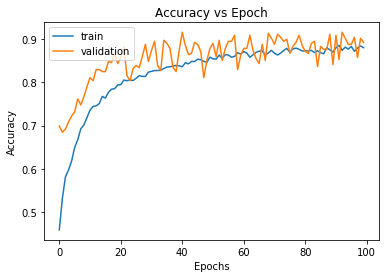

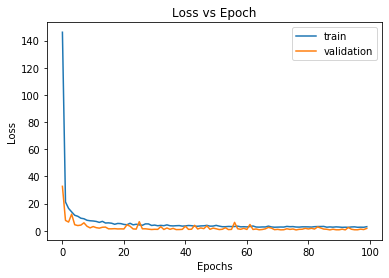

In [0]:
try:
    # summarize history for accuracy
    plt.plot(history_mix.history['acc'])
    plt.plot(history_mix.history['val_acc'])
    plt.title('Accuracy vs Epoch')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_mix.history['loss'])
    plt.plot(history_mix.history['val_loss'])
    plt.title('Loss vs Epoch')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
except:
    print("One of the metrics used for plotting graphs is missing! See 'model.compile()'s `metrics` argument.")

In [0]:
def show_pred(x, y_real, y_pred):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    for ax in axes:
        ax.imshow(x[0, ..., 0], 'gray')
        ax.axis('off')
        
    points_real = np.vstack(np.split(y_real[0], 15)).T
    points_pred = np.vstack(np.split(y_pred[0], 15)).T
    axes[0].plot(points_pred[0], points_pred[1], 'o', color='red')
    axes[0].set_title('Predictions', size=16)
    axes[1].plot(points_real[0], points_real[1], 'o', color='green')
    axes[1].plot(points_pred[0], points_pred[1], 'o', color='red', alpha=0.5)
    axes[1].set_title('Real', size=16)

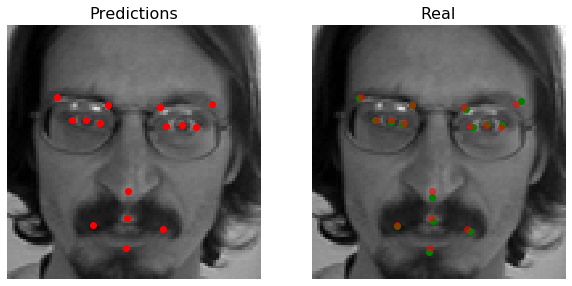

In [0]:
sample_x = X_valid[2, None]
sample_y = y_valid[2, None]
pred = model.predict(sample_x)
show_pred(sample_x, sample_y, pred)

In [0]:
predictions=model.predict(X_valid)
result=np.abs(predictions - y_valid)
mad_val=np.sum(result, axis=1)/30

indices=mad_val.argsort()
indices.shape

(428,)

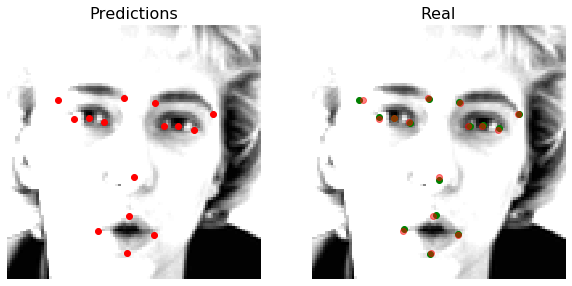

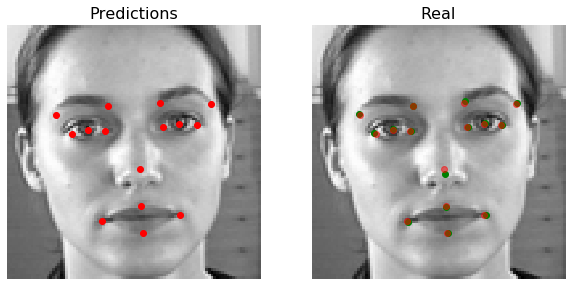

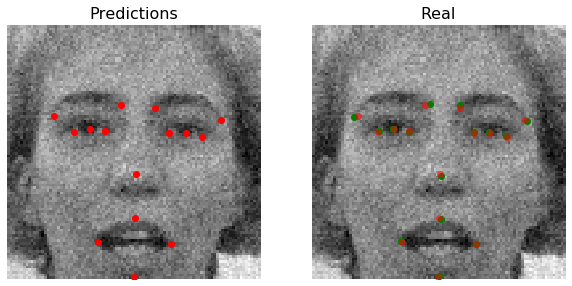

In [0]:
for i in range(3):
    sample_x = X_valid[indices[i], None]
    sample_y = y_valid[indices[i], None]
    pred1 = model.predict(sample_x)
    show_pred(sample_x, sample_y, pred1)

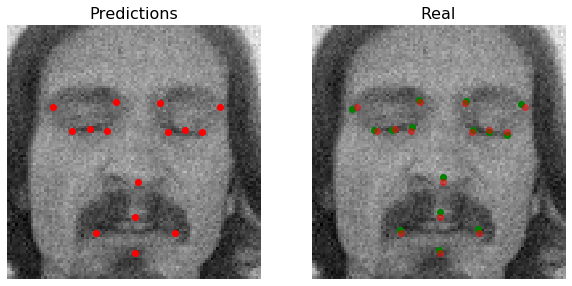

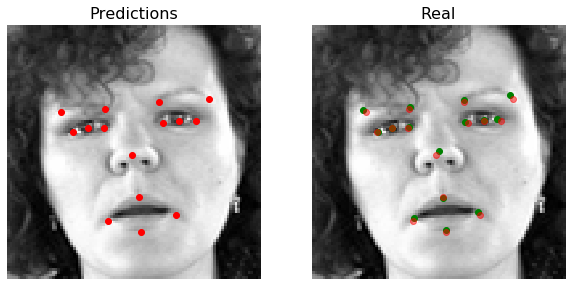

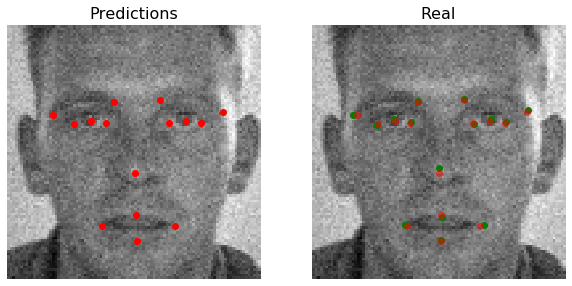

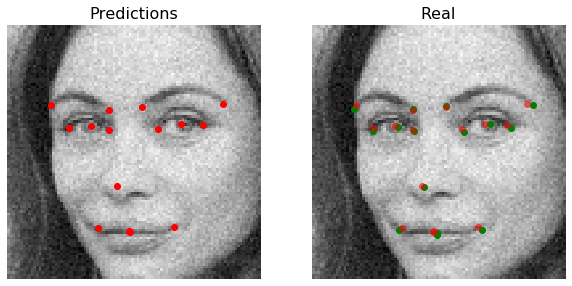

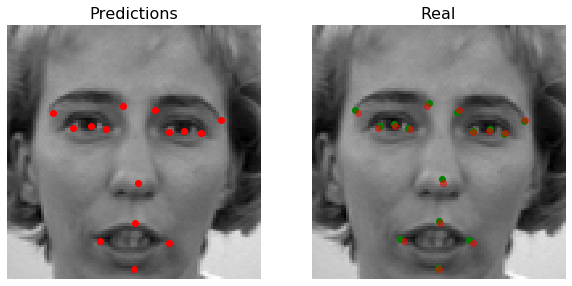

In [0]:
for _ in range(5):
    index = np.random.choice(X_valid.shape[0])
    sample_x = X_valid[index, None]
    sample_y = y_valid[index, None]
    pred1_1 = model.predict(sample_x)
    show_pred(sample_x, sample_y, pred1_1)

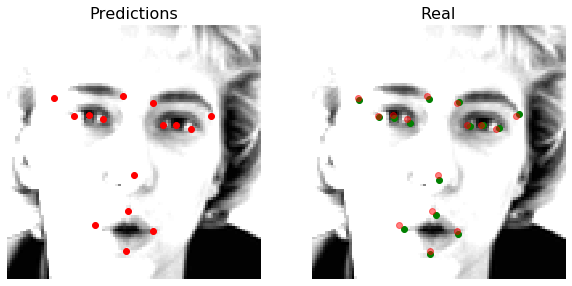

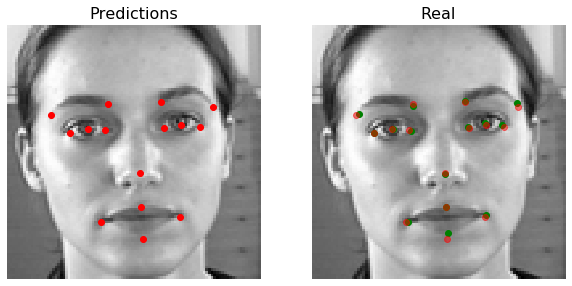

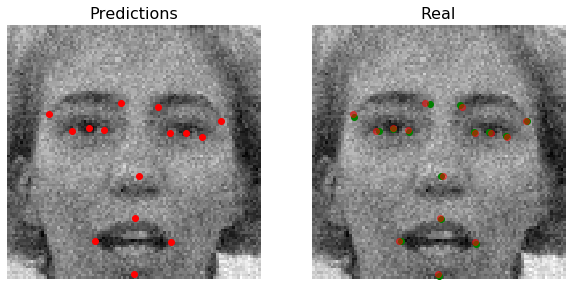

In [0]:
for i in range(3):
    sample_x = X_valid[indices[i], None]
    sample_y = y_valid[indices[i], None]
    pred2 = model_2.predict(sample_x)
    show_pred(sample_x, sample_y, pred2)

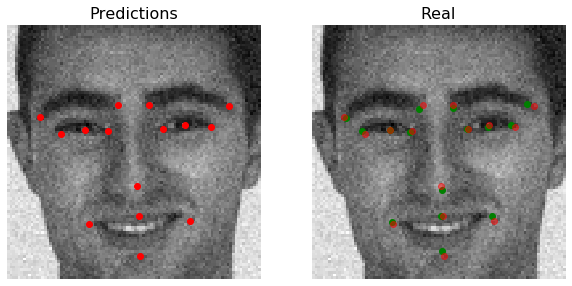

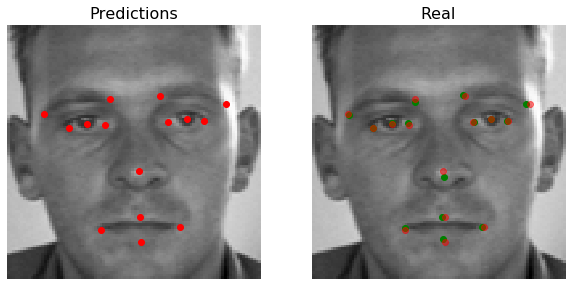

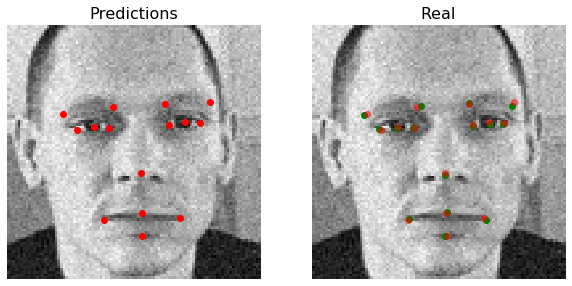

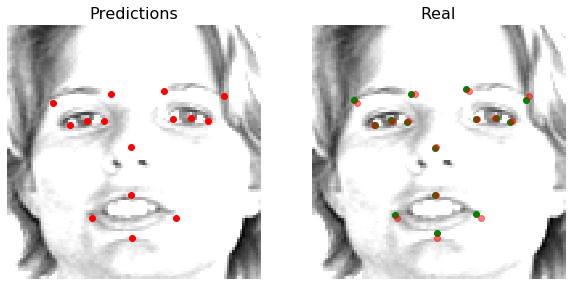

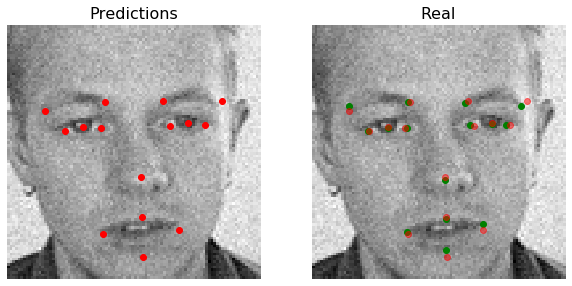

In [0]:
for _ in range(5):
    index = np.random.choice(X_valid.shape[0])
    sample_x = X_valid[index, None]
    sample_y = y_valid[index, None]
    pred2_1 = model_2.predict(sample_x)
    show_pred(sample_x, sample_y, pred2_1)

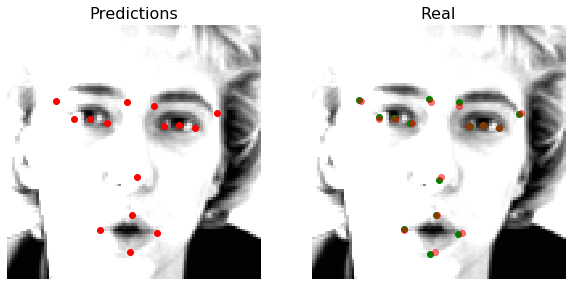

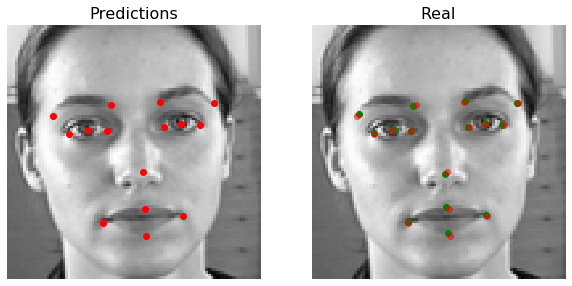

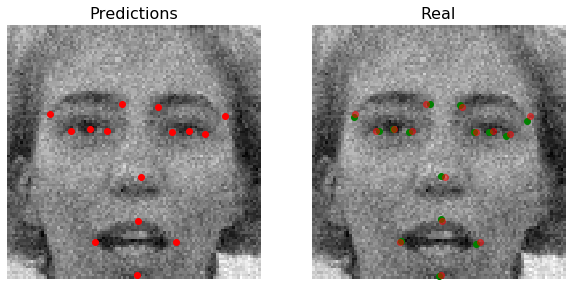

In [0]:
for i in range(3):
    sample_x = X_valid[indices[i], None]
    sample_y = y_valid[indices[i], None]
    pred3 = model_3.predict(sample_x)
    show_pred(sample_x, sample_y, pred3)

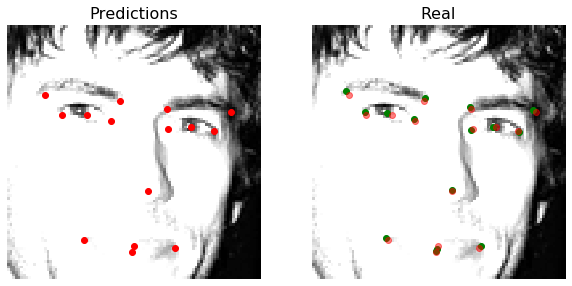

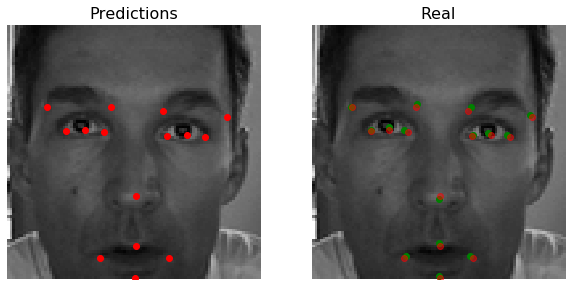

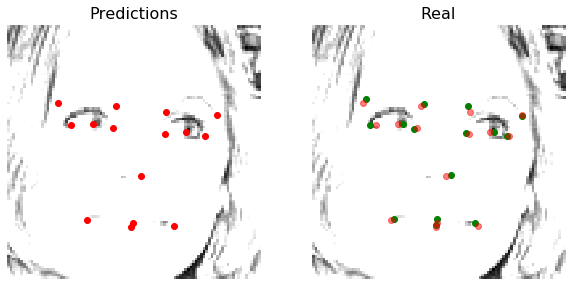

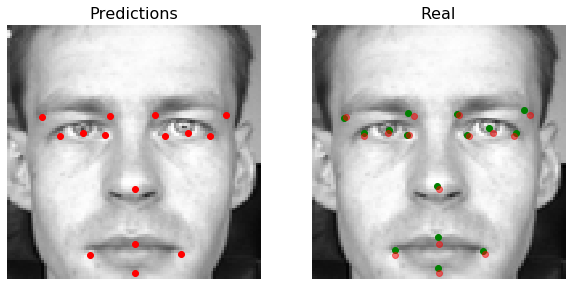

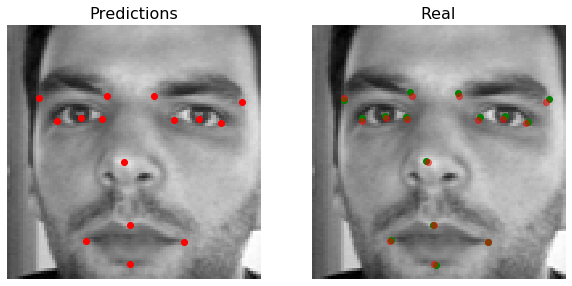

In [0]:
for _ in range(5):
    index = np.random.choice(X_valid.shape[0])
    sample_x = X_valid[index, None]
    sample_y = y_valid[index, None]
    pred3_1 = model_3.predict(sample_x)
    show_pred(sample_x, sample_y, pred3_1)

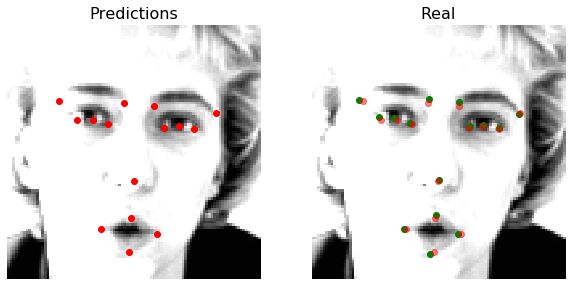

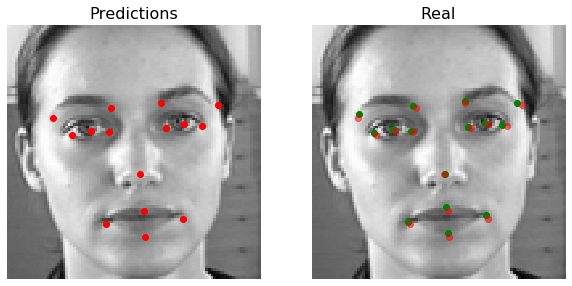

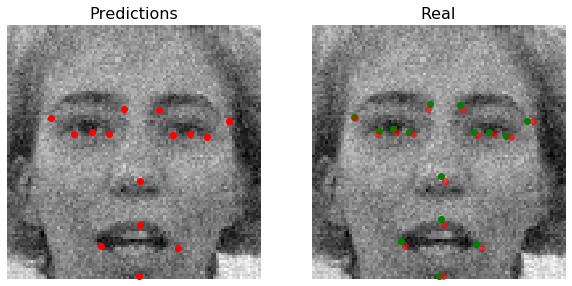

In [0]:
for i in range(3):
    sample_x = X_valid[indices[i], None]
    sample_y = y_valid[indices[i], None]
    pred_mix = model_mix.predict(sample_x)
    show_pred(sample_x, sample_y, pred_mix)

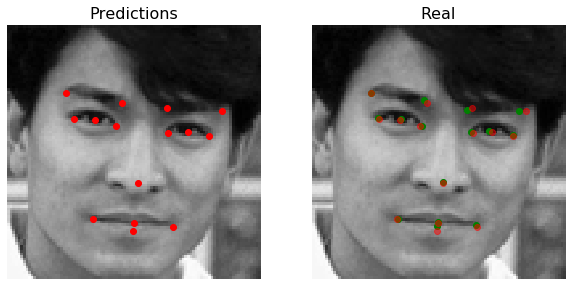

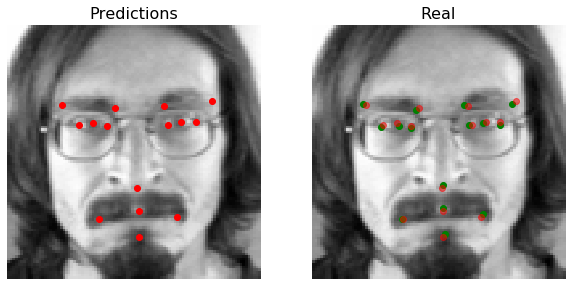

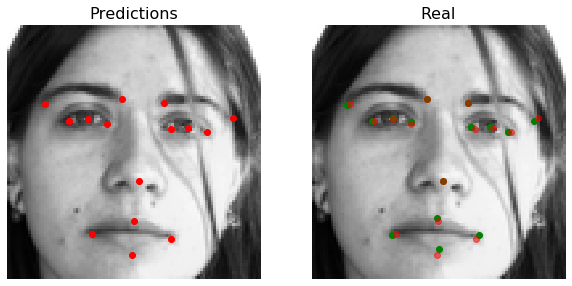

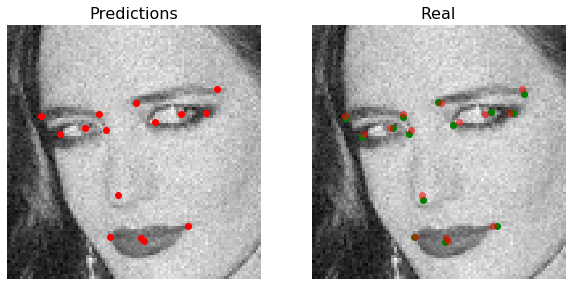

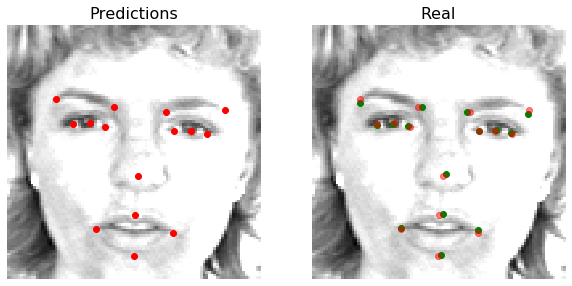

In [0]:
for _ in range(5):
    index = np.random.choice(X_valid.shape[0])
    sample_x = X_valid[index, None]
    sample_y = y_valid[index, None]
    predmix_1 = model_mix.predict(sample_x)
    show_pred(sample_x, sample_y, predmix_1)

In [0]:
predictions = model.predict(test_images)

In [0]:
predictions2=model_2.predict(test_images)

In [0]:
predictions3=model_3.predict(test_images)

In [0]:
predictions_mix=model_mix.predict(test_images)

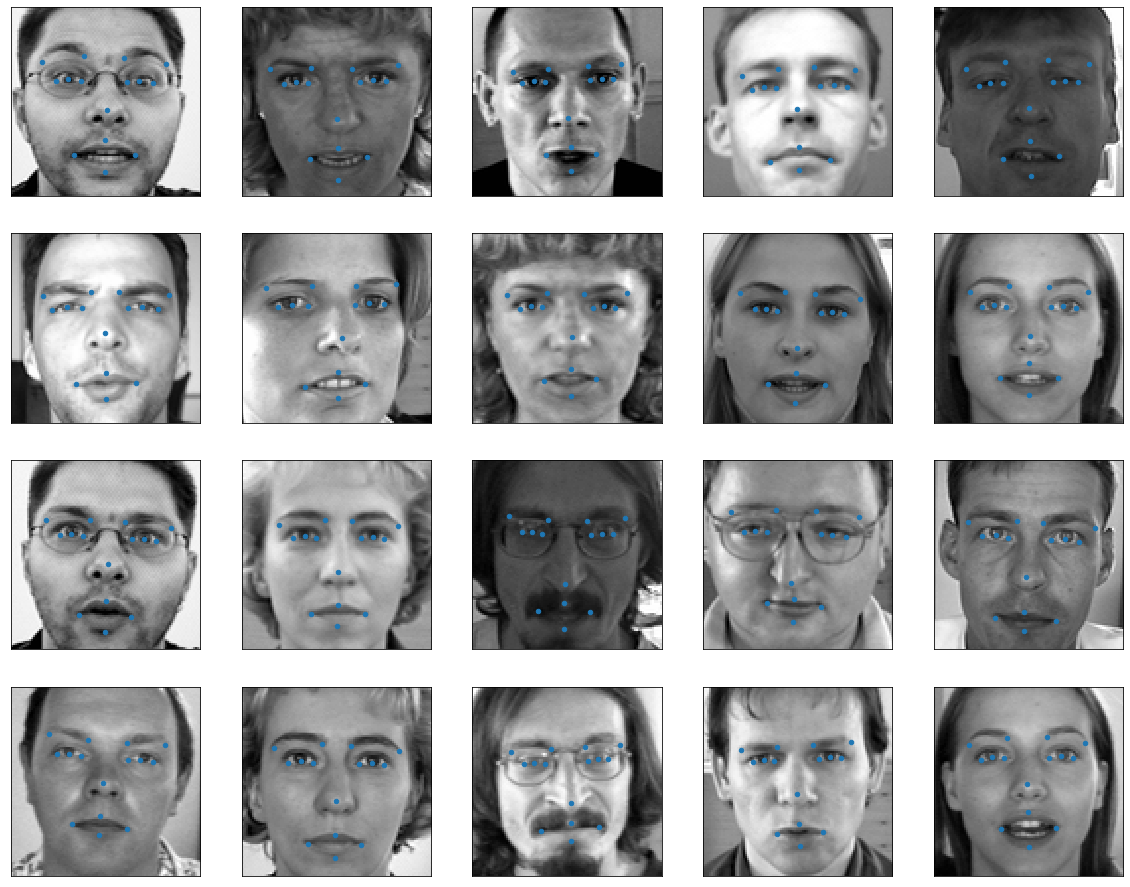

In [0]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], predictions[i], axis, "")
plt.show()

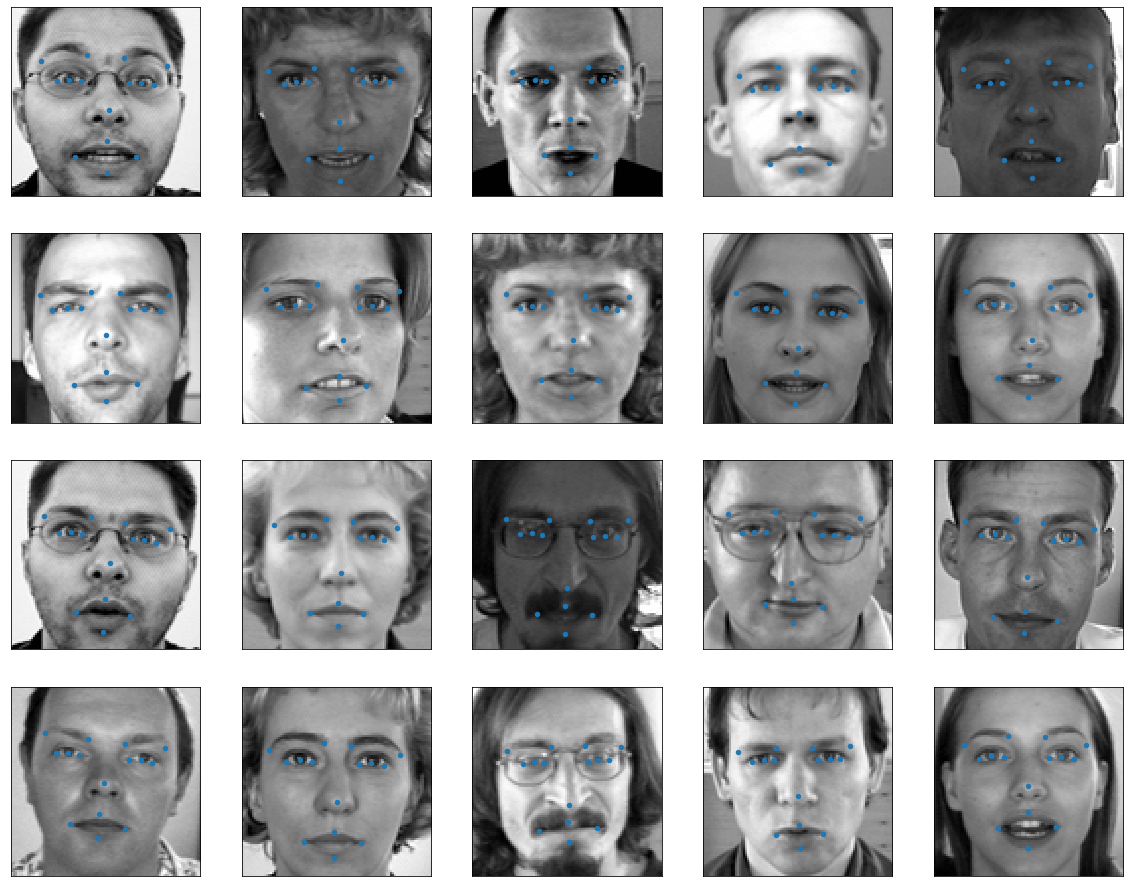

In [0]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], predictions2[i], axis, "")
plt.show()

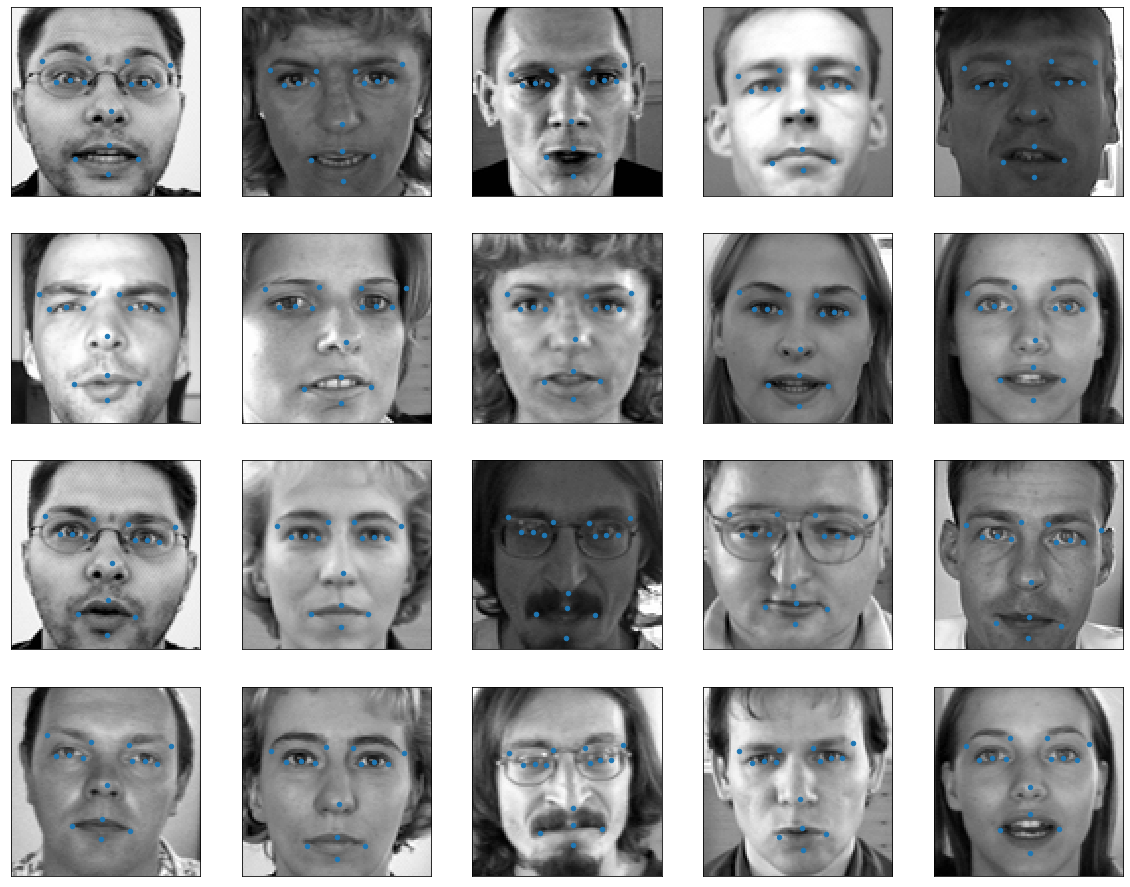

In [0]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], predictions3[i], axis, "")
plt.show()

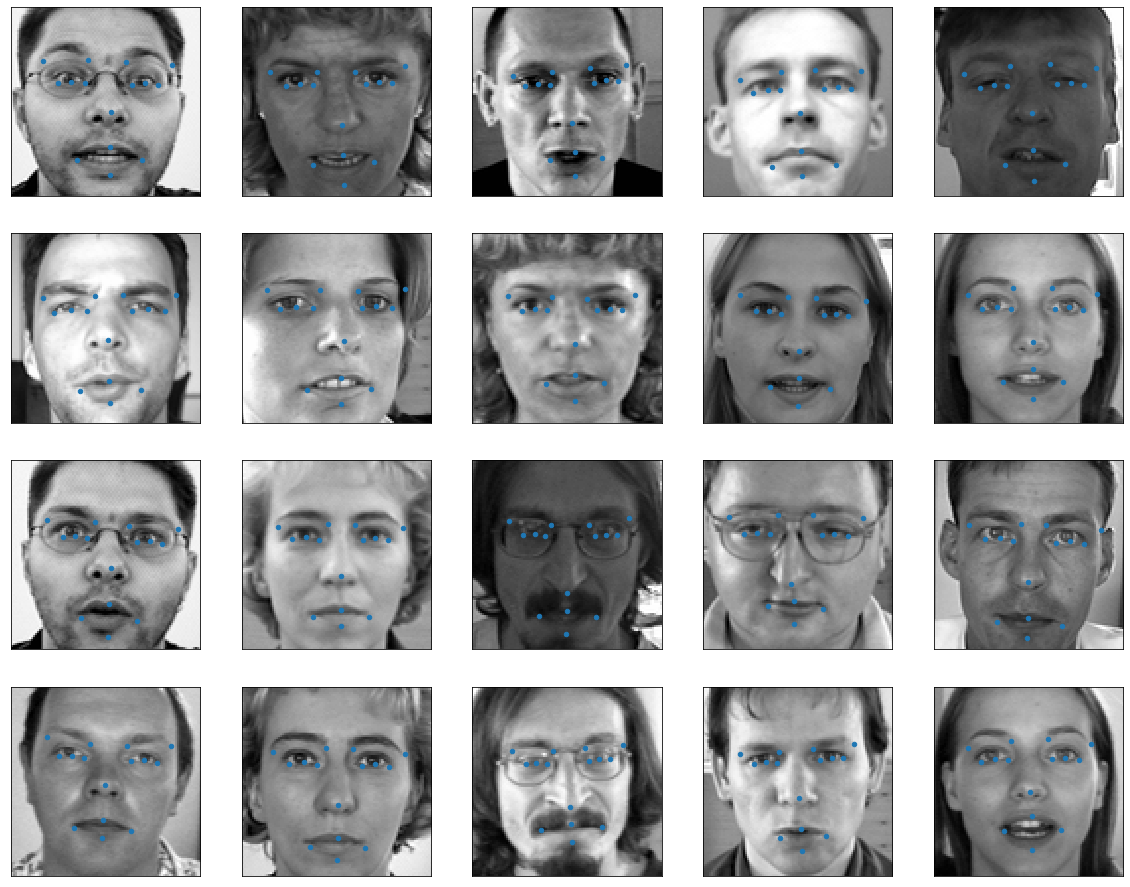

In [0]:
fig = plt.figure(figsize=(20,16))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], predictions_mix[i], axis, "")
plt.show()